# 🧠 AND Gate Perceptron Learning

This notebook demonstrates how a simple perceptron model learns the logic behind the AND gate.  

🔍It covers:  
- Step-by-step training based on the perceptron learning rule   
- Final testing and evaluation

## 🔧 Step 2 [Hands-on]: AND Gate Perceptron Learning from Scratch

Now the real hands-on part begins!  
In this step, we define the input values and their expected outputs for the AND gate.

The AND gate is a logical function that returns `1` only when **both inputs are 1**.  
We will create the input-output pairs that serve as training data for the perceptron.




### 🔢 Input and Output Mapping for the AND Gate:

| Input `x₁` | Input `x₂` | Target `t` (x₁ AND x₂) |
|------------|------------|-------------------------|
| 0          | 0          | 0                       |
| 0          | 1          | 0                       |
| 1          | 0          | 0                       |
| 1          | 1          | 1                       |

We'll use this data to train our perceptron in the next steps.  
Let’s move forward!

### 🔧 Step 2.1: Setup

Import the required libraries.

If you're running this notebook on a new environment, make sure to install the required packages first:

```bash
pip install matplotlib
```

In [1]:
# === Import the required libraries ===
import json                         # Save the learning history file
import random                       # Randomize input order in tests
import matplotlib.pyplot as plt     # Plotting

# === Set a random seed for reproducibility ===
# This ensures that any random operations (e.g. shuffling, random weight initialization)
# will produce the same results every time the notebook is run.
random.seed(42)

# Display plots inside Jupyter
%matplotlib inline


### 🧮 Step 2.2: Define Input and Target Output

We define the four possible input combinations for the AND gate  
along with their corresponding target values.

In [2]:
# === Define training data for the AND logic gate ===
# Each item is a pair of binary inputs: [x1, x2]
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

# === Define expected outputs for the AND logic gate ===
# These are the target values that the perceptron should learn
targets = [
       # x1 AND x2
    0, #  0 AND  0 = 0
    0, #  0 AND  1 = 0
    0, #  1 AND  0 = 0
    1, #  1 AND  1 = 1 
]

# === Ensure input and target data are properly aligned ===
assert len(inputs) == len(targets)

> **📝 Note:**  
> The AND gate outputs `1` only when both inputs are `1`.  
> These examples represent all possible combinations of two binary inputs.

### 🧠 Step 2.3: Define Step Function

We define a step activation function that returns `1`  
when the input is greater than or equal to `0`, and `0` otherwise.

In [3]:
# === Step activation function ===
def step(z):
    """Step activation function: returns 1 if z >= 0, else 0"""
    return 1 if z >= 0 else 0

> **📝 Note:**  
> The step function is commonly used in binary classifiers such as the perceptron,  
> especially when the output should be either `0` or `1`.


> **💡 Tips**  
> In modern neural networks, the step function is often replaced by smoother functions  
> like the sigmoid or ReLU to enable gradient-based optimization.

> **📝 Note:**  
> The perceptron with a step activation function can solve problems that are **linearly separable**,  
> such as the AND or OR gates.  
> It cannot correctly classify problems like the XOR gate, which are **not linearly separable**

#### 📈 Step 2.3.1: Step Function Visualization

The plot below shows the behavior of the step activation function.

- It returns **1** when the input ≥ 0
- It returns **0** when the input < 0

This function acts as a simple threshold and is commonly used in perceptron models to produce binary outputs.

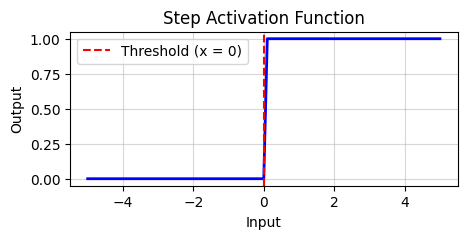

In [4]:
# === Generate x values manually (from -5 to 5, with step 0.1) ===
x_vals = []
y_vals = []

x = -5.0
while x <= 5.0:
    x_vals.append(x)
    y_vals.append(step(x))  # Apply the step function
    x += 0.1    # Increment by 0.1

# === Plot the step function ===
fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(x_vals, y_vals, color="blue", linewidth=2)
ax.grid(True, alpha=0.5)
ax.set_xlabel("Input")
ax.set_ylabel("Output")
ax.set_title("Step Activation Function")

# Show threshold at x = 0
ax.axvline(0, color='red', linestyle='--', label="Threshold (x = 0)")

plt.legend()

plt.show()


### 🛠️ Step 2.4: Initialize Parameters

We use the step activation function  
and initialize the weights and bias with either zeros or random values.

In [5]:
# === Initialize weights and bias ===

# --- [Option 1: Initialize all to 0.0 for deterministic behavior (uncomment to use)] ---
# This is useful for reproducibility and debugging.
# In practice, however, random initialization is preferred to break symmetry.
# weights = [0.0, 0.0]    # Initial weights: w1 and w2
# bias = 0.0              # Initial bias

# --- [Option 2: Random initialization for symmetry breaking (default)] ---
# This is useful because random values help the perceptron learn independent features.
weights = [random.uniform(-1, 1) for _ in range(2)]     # Initial weights: w1 and w2
bias = random.uniform(-1, 1)    # Initial bias

print(f"weights={weights}, bias={bias}")

# === Set learning rate ===
# Controls how much the weights are updated during training
learning_rate = 0.1     # Typical value for a perceptron

weights=[0.2788535969157675, -0.9499784895546661], bias=-0.4499413632617615


> **📝 Note:**  
> Random initialization helps each neuron learn unique features.  
> Setting all weights to 0 would cause all neurons to learn the same thing, making learning ineffective. 


### 🔍 Step 2.5: Check Model Predictions Before Training

Before applying the Perceptron Learning Rule, we test how the untrained model performs.  
This helps us visualize the effect of training later on. 

In [6]:
# === Function to test the trained model on all possible inputs ===
def test_model():
    global weights, bias
    
    # Inner function: use current weights and bias to make a prediction
    def predict(x1, x2):
        w1, w2 = weights
        return step( (w1 * x1) + (w2 * x2) + bias )

    # Define the 4 possible input combinations for the AND gate
    test_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
    
    # Shuffle input order to avoid relying on a fixed order
    random.shuffle(test_data)
    
    correct_count = 0
    
    print("\n=== 🧪 Model Test Results ===")
    for d in test_data:
        x1, x2 = d
        prediction = predict(x1, x2)
        correct_answer = x1 & x2    # AND gate ground truth
        
        # Check if prediction is correct
        is_correct = (prediction == correct_answer)
        if is_correct:
            correct_count += 1
        
        # Print input, prediction, expected answer, and result
        result = "✅ Correct" if is_correct else "❌ Incorrect"
        print(f"Input: {d}, Prediction: {prediction}, Expected: {correct_answer} → {result}")
        
    # Calculate accuracy
    accuracy = correct_count / len(test_data) * 100
    print(f"\nAccuracy: {accuracy:.1f}% ({correct_count}/{len(test_data)})")
    
    # Optionally print final weights and bias
    print(f"\nFinal Weights: w1 = {weights[0]:.3f}, w2 = {weights[1]:.3f}")
    print(f"Final Bias: {bias:.3f}")

#### ▶️ Step 2.5.1: Run the Test Before Training

We now use the `test_model()` function to check how the untrained perceptron performs on all possible AND gate inputs.

In [7]:
test_model()


=== 🧪 Model Test Results ===
Input: [1, 1], Prediction: 0, Expected: 1 → ❌ Incorrect
Input: [1, 0], Prediction: 0, Expected: 0 → ✅ Correct
Input: [0, 0], Prediction: 0, Expected: 0 → ✅ Correct
Input: [0, 1], Prediction: 0, Expected: 0 → ✅ Correct

Accuracy: 75.0% (3/4)

Final Weights: w1 = 0.279, w2 = -0.950
Final Bias: -0.450


> **📝 Note:**  
> Evaluating the model before training helps highlight the improvements achieved by the Perceptron Learning Rule.  
> This baseline performance can be used to compare the effect of weight updates after training.

### 🚀 Step 2.6: Training Loop (Perceptron Learning)

This loop applies the Perceptron Learning Rule until all outputs are correct or until a maximum number of epochs.

- In each epoch, the model checks all training examples.
- If a prediction is incorrect, it updates the weights and bias using the Perceptron Learning Rule.
- Training stops early if all predictions are correct.


In [8]:
# === Set training limit to prevent infinite loops ===
TRAINING_LIMIT = 100

# === Initialize history list to record weights and bias after each update ===
history = []

# ****************************************************************************************************
# Perceptron Training Loop
# ****************************************************************************************************
for epoch in range(TRAINING_LIMIT):
    correct_count = 0   # Count of correct predictions in this epoch
    
    for i in range(len(inputs)):
        # === Forward Propagation ===
        # Input layer: Get input values and corresponding target
        x1, x2 = inputs[i]
        target = targets[i]
        w1, w2 = weights
        
        # Output layer (Neuron): Compute weighted sum and apply step function
        z = (w1 * x1) + (w2 * x2) + bias    # Linear combination (pre-activation)
        y = step(z)
        
        # === Apply Perceptron Learning Rule ===
        error = target - y
        
        if error == 0:
            correct_count += 1
            
        else:
            # Update weights and bias
            weights[0] += learning_rate * error * x1
            weights[1] += learning_rate * error * x2
            bias       += learning_rate * error
            
        # Record weights and bias after each update
        history.append((weights.copy(), bias))
    
    # Early stopping: Exit if all predictions are correct
    if correct_count == len(targets):
        break

> **📝 Note:**  
> In the Perceptron algorithm,  
> `error` typically refers to the raw difference between the target and prediction.  
> Unlike modern neural networks that minimize a loss function,  
> the perceptron updates the weights directly based on this error.


> **📝 Note:**  
> The Perceptron Learning Rule updates the weights and bias **only when a mistake is made**.  
> This makes the model gradually shift the decision boundary until all inputs are classified correctly.

### 🧪 Step 2.7: Final Model Test

We evaluate the trained model by predicting the outputs for all inputs and comparing them to the ground truth.

> Now that the model has been trained, we run the `test_model()` function again to evaluate its final performance.  
> The predictions should now match the expected outputs if learning was successful.

In [9]:
test_model()


=== 🧪 Model Test Results ===
Input: [1, 1], Prediction: 1, Expected: 1 → ✅ Correct
Input: [0, 1], Prediction: 0, Expected: 0 → ✅ Correct
Input: [1, 0], Prediction: 0, Expected: 0 → ✅ Correct
Input: [0, 0], Prediction: 0, Expected: 0 → ✅ Correct

Accuracy: 100.0% (4/4)

Final Weights: w1 = 0.279, w2 = 0.250
Final Bias: -0.450


### 👉 Step 2.8: Saving Learning History to a File

In this step, we save the learning history to a file so that we can later plot the decision boundary  
and better understand how the perceptron learns.

In [10]:
filepath = "./learning_history.json"

with open(filepath, mode='w') as fd:
    json.dump(
        obj={
            'inputs': inputs,
            'targets': targets,
            'history': history
        }, fp=fd, indent=2)

End of Step 2. Let's move on to the next step🔥